# Data analysis project 3:

Applying machine learning methods to movie ratings data

Mission command preamble: As in general, we won’t tell you how to do something. That is up to you and your creative problem solving skills. However, we will tell you what we would like you to do. One exception: We do expect you to do this work yourself, so it reflects your intellectual contribution.

Purpose: In this project, you will demonstrate essential machine learning skills. We revisit the same dataset you already used in project 1 and project 2. This will highlight what machine learning methods can and cannot do for you, compared to Hypothesis testing and Prediction methods. Please write a report (1-3 pages, as needed) that answers all the questions below. Use figures as needed to make your case.

Dataset description: This dataset features ratings data of 400 movies from 1097 research participants. 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1

Row 2-1098: Responses from individual participants
Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5)
Columns 421-464: These columns contain responses to personality questions (1-5)
Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
Column 476: Only child (1 = yes, 0 = no, -1 = no response)
Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.

What we would like you to do: (each question is worth 20% of the grade score):

# 1) 
Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. As laid out above, these columns contain self-report answers to personality and how these individuals experience movies, respectively. It is us to you whether you do one PCA each for personality and movie experience, or one overall, but regardless of that, we would like you to:

a) Determine the number of factors (principal components) that you will interpret meaningfully (by
a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your
answer.

b) Semantically interpret what those factors represent (hint: Inspect the loadings matrix). Explicitly
name the factors you found and decided to interpret meaningfully in 1a). Be creative.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sn

df = pd.DataFrame(pd.read_csv('movieReplicationSet.csv'))
print("Dimension of the original data:",df.shape,"\n")

#grab the columns 421-474
selected_df = df.copy().iloc[:,421:474]
print("Dimension of the rating data:", selected_df.shape,"\n")
selected_df.head()

#print("Possible ratings are", np.sort(pca_df.iloc[:,1].dropna().unique()),"\n")
#pca_df.head()

Dimension of the original data: (1097, 477) 

Dimension of the rating data: (1097, 53) 



,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,Is full of energy,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,2.0,NaN,4.0,4.0,5.0,2.0,3.0,5.0,1.0,1.0,...,3.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,3.0,...,5.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,...,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0
3,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,5.0,4.0,...,4.0,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0
4,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,3.0,...,4.0,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0


In [3]:
print(df.shape)
df.head()

(1097, 477)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [4]:
df[df["The Life of David Gale (2003)"].isna() == True].count()

The Life of David Gale (2003)                                                 0
Wing Commander (1999)                                                        18
Django Unchained (2012)                                                     393
Alien (1979)                                                                231
Indiana Jones and the Last Crusade (1989)                                   394
                                                                           ... 
Movies change my position on social economic or political issues           1004
When watching movies things get so intense that I have to stop watching    1006
Gender identity (1 = female; 2 = male; 3 = self-described)                 1001
Are you an only child? (1: Yes; 0: No; -1: Did not respond)                1021
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)         1021
Length: 477, dtype: int64

In [2]:
#Fill missing data with the median of each column
selected_df.fillna(selected_df.median(), inplace=True)
selected_df.head()

,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,Is full of energy,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,2.0,4.0,4.0,4.0,5.0,2.0,3.0,5.0,1.0,1.0,...,3.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,3.0,4.0,1.0,3.0,5.0,3.0,4.0,3.0,3.0,3.0,...,5.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,2.0,4.0,2.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,...,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0
3,3.0,5.0,4.0,5.0,3.0,4.0,1.0,2.0,5.0,4.0,...,4.0,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0
4,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,4.0,3.0,...,4.0,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0


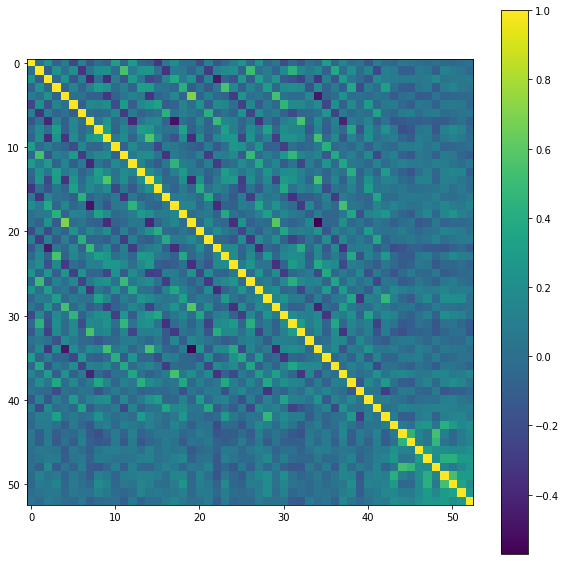

In [3]:
#%% 3 Create the correlation matrix and look at it. 
# Compute correlation between each measure across all courses:
r = np.corrcoef(selected_df,rowvar=False) # True = variables are rowwise; False = variables are columnwise

# Plot the data:
plt.figure(figsize = (10,10))
plt.imshow(r) 
plt.colorbar()


In [4]:
#%% 4 Actually doing the PCA

# PCA expects normally distributed DATA so we z-score the data first
# 1. Z-score the data:
zscoredData = stats.zscore(selected_df)
print(zscoredData.shape)
zscoredData.head()


(1097, 53)


,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,Is full of energy,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,-1.065598,-0.060205,1.050192,0.441108,1.496071,-2.093722,-0.268512,1.848405,-3.863730,-2.180712,...,-0.722760,1.137902,-1.290173,-1.189631,2.006765,-0.187334,0.436179,0.603624,1.365130,-0.915089
1,-0.131177,-0.060205,-1.511840,-0.671295,1.496071,-0.952165,0.666591,0.074389,-1.425000,-0.252263,...,0.866153,0.239213,-1.290173,0.156450,-1.451327,-0.999608,1.240362,0.603624,-0.253840,-0.124031
2,-1.065598,-0.060205,-0.657830,-0.671295,-0.371039,0.189392,0.666591,-0.812619,-0.205636,-0.252263,...,0.071697,0.239213,-1.290173,1.502530,0.623528,0.624940,0.436179,0.603624,0.555645,1.458085
3,-0.131177,1.185932,1.050192,1.553511,-0.371039,0.189392,-2.138718,-0.812619,1.013729,0.711961,...,0.071697,-1.558164,-1.290173,0.156450,-1.451327,-0.999608,-0.368003,0.603624,-0.253840,-0.915089
4,0.803244,-0.060205,1.050192,-1.783699,-0.371039,0.189392,0.666591,-0.812619,-0.205636,-0.252263,...,0.071697,0.239213,1.049198,-0.516590,-0.068090,-0.187334,0.436179,1.413131,0.555645,1.458085


In [5]:
# Run the PCA:
pca = PCA().fit(zscoredData)

#eigvals_only == False

#Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_
print(eigVals)


[6.64177855 4.59161265 3.41501404 3.19118554 2.8397114  2.1785489
 1.93444203 1.53949659 1.09274679 1.02417698 0.98824199 0.97828491
 0.89464451 0.8710333  0.84912982 0.82134224 0.7954384  0.77852
 0.76026193 0.75193992 0.7140477  0.69409049 0.67872019 0.66228159
 0.64943444 0.64088332 0.6207692  0.60598723 0.59833843 0.57306734
 0.56353087 0.54657134 0.54181373 0.52215217 0.49904665 0.49655462
 0.48548258 0.47438928 0.45722052 0.43563233 0.42357416 0.40786443
 0.40042812 0.39062508 0.38485442 0.37739908 0.37014268 0.36130273
 0.33840972 0.33223072 0.32395445 0.30093241 0.23907516]


In [6]:
# Rotate data
rotatedData = pd.DataFrame(pca.fit_transform(zscoredData))*-1
rotatedData.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-1.421647,0.003626,1.013982,-1.090947,-3.635629,-0.638045,4.586498,0.642820,2.635746,1.951169,...,0.309111,-0.030991,-0.294225,-0.598019,-0.923823,-0.396482,0.349457,1.307493,-1.349301,-0.092425
1,-1.335319,-0.874773,1.811695,-1.951896,-0.838969,-0.040798,1.162300,2.193658,2.266868,-1.100870,...,-0.308427,-0.392602,-0.617685,0.432308,-0.110132,0.429068,-0.704115,0.478888,-0.216088,-0.545958
2,-0.231484,1.098985,-1.165078,-1.311073,1.096029,-0.446921,-0.014464,1.113064,-0.139730,-0.691933,...,0.002504,-0.616113,0.150702,-0.521029,0.514880,-0.105248,-0.072769,0.141901,-0.104155,-0.551940
3,1.907821,1.825072,1.774959,-0.098473,-0.342190,-1.640752,-3.576347,-0.460274,0.518861,-1.001117,...,0.038206,-0.630959,0.668480,0.337101,-0.482673,-0.527879,-0.316029,-0.184073,-0.500770,-0.368116
4,-2.460307,1.138841,-1.560553,0.144555,1.117730,-0.183134,-0.468212,0.887601,0.168056,-1.113979,...,0.459226,0.475591,-0.955365,-0.099447,-0.597931,0.618090,0.881946,0.480138,0.169220,0.686425


In [7]:
# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100
covarExplained

array([12.52023407,  8.65552271,  6.43754905,  6.01561609,  5.35306185,
        4.10672261,  3.64656346,  2.90206268,  2.05990692,  1.93064786,
        1.8629078 ,  1.84413797,  1.68646975,  1.64196092,  1.60067127,
        1.54828966,  1.49945906,  1.46756664,  1.43314885,  1.41746127,
        1.34603168,  1.30841089,  1.27943676,  1.2484488 ,  1.22423099,
        1.20811153,  1.17019495,  1.14232986,  1.12791132,  1.08027347,
        1.06229655,  1.03032659,  1.02135815,  0.98429469,  0.94073912,
        0.93604146,  0.91516986,  0.89425819,  0.86189383,  0.82119852,
        0.79846801,  0.76885402,  0.75483604,  0.7363566 ,  0.72547849,
        0.71142462,  0.69774578,  0.68108184,  0.63792686,  0.62627899,
        0.61067763,  0.5672794 ,  0.45067401])

# 1 a)

We decided to use **Kaiser criterion** for selecting the variables by keep all factors with an eigenvalue > 1. As shown in the scree plot below we have 10 eigen values that satisfies Kaiser criterion. Those ten factors account for 55.49% of the variance.  


In [8]:
print("Number of eigen values above 1:", len(eigVals[eigVals>1]))

Number of eigen values above 1: 10


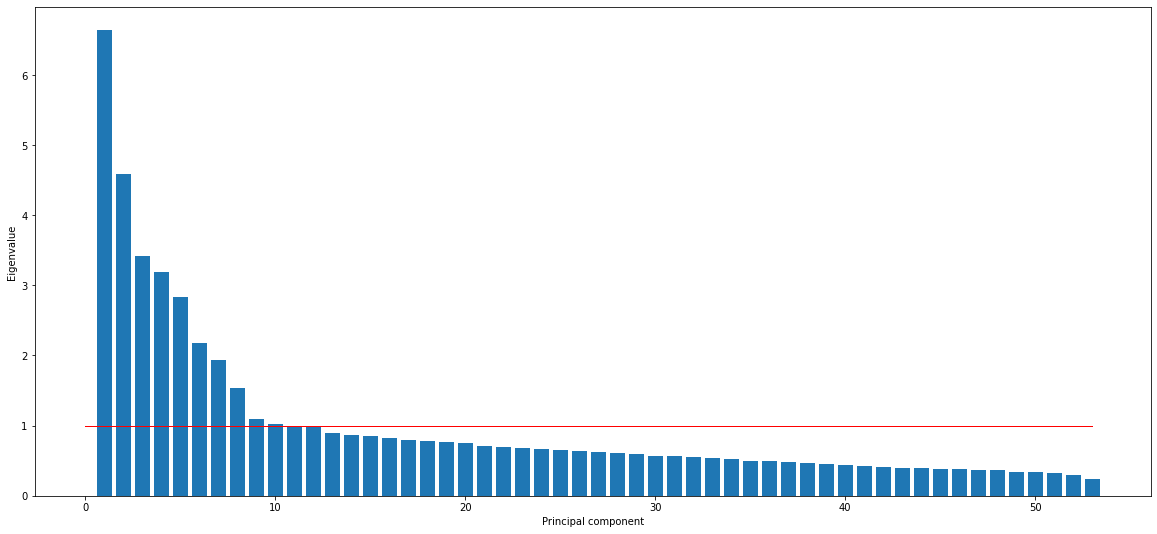

In [9]:
# Plotting a bar graph of the sorted Eigenvalues
numClasses = 53
plt.figure(figsize=(20,9))
plt.bar(np.linspace(1,53,53),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line


In [10]:
tot = sum(eigVals)
var_exp = [( i /tot ) * 100 for i in sorted(eigVals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained\n", var_exp)

print("\nCumulative Variance Explained by top 10 eigen values\n", cum_var_exp[10])

print("\nCumulative Variance Explained\n", cum_var_exp)


Variance Explained
 [12.52023406828752, 8.655522713122627, 6.437549048390723, 6.015616086182817, 5.353061853070207, 4.1067226097114435, 3.6465634568804544, 2.9020626841974004, 2.059906923171121, 1.9306478646843754, 1.8629078020439498, 1.8441379697776608, 1.6864697522571626, 1.6419609212510358, 1.6006712665536729, 1.5482896635402603, 1.499459055286528, 1.467566641740854, 1.4331488490525908, 1.417461266465783, 1.3460316784799349, 1.3084108911516346, 1.2794367646123987, 1.2484488027444653, 1.2242309926770862, 1.2081115286493391, 1.1701949521703028, 1.1423298644661064, 1.1279113245537382, 1.080273471970002, 1.0622965502494561, 1.0303265927262142, 1.0213581540934025, 0.984294687325472, 0.9407391180826391, 0.9360414596406814, 0.915169858101558, 0.8942581874090071, 0.861893826791518, 0.8211985220167846, 0.798468007673626, 0.7688540179664229, 0.7548360388487184, 0.736356597482999, 0.7254784878850351, 0.7114246211193044, 0.6977457827010395, 0.6810818358797924, 0.6379268604314364, 0.626278986915

## 1 b) 

Semantically interpret what those factors represent (hint: Inspect the loadings matrix). Explicitly name the factors you found and decided to interpret meaningfully in 1a). Be creative.


["lively", "emotional", "reticent", "self-conceit", "creativity", 
            "indolent", "temperamental", "absentminded","artistic", "ingenious"]

In [11]:
# Loadings (eigenvectors): 
# each row represents loadings for a prinicipal component (PC), so transpose it such that each column represents a PC

loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=["PC"+str(i) for i in range(1,54)], index=zscoredData.columns)
loadings_df= loadings_df.abs().reset_index()
loadings_df.rename(columns = {"index": "question"}, inplace =True)
loadings_df.head()

,question,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,Tends to find fault with others,0.114751,0.062101,0.005472,0.238379,0.117214,0.060243,0.011754,0.024170,0.043760,...,0.006826,0.022125,0.068766,0.100965,0.060573,0.125396,0.156491,0.016344,0.095718,0.049225
1,Does a thorough job,0.190830,0.058870,0.206464,0.201414,0.084251,0.022026,0.056890,0.027569,0.014042,...,0.018055,0.031133,0.347231,0.105687,0.201117,0.052633,0.204092,0.106658,0.176767,0.039522
2,Is depressed/Blue,0.190697,0.185707,0.103022,0.049165,0.067270,0.076478,0.038667,0.085724,0.053492,...,0.086699,0.016705,0.008125,0.039520,0.057267,0.210313,0.244744,0.020984,0.299481,0.035784
3,Is original/comes up with new ideas,0.173850,0.143171,0.005212,0.010154,0.236953,0.058957,0.028431,0.213390,0.181997,...,0.085186,0.124618,0.334225,0.163036,0.068207,0.348742,0.152016,0.153855,0.027379,0.109491
4,Is reserved,0.128793,0.031706,0.344211,0.125387,0.062702,0.135300,0.129546,0.016111,0.002780,...,0.062570,0.169992,0.334590,0.004071,0.198067,0.068669,0.128200,0.185261,0.002564,0.466932


In [12]:
semantic = ["lively", "emotional", "reticent", "self-conceit", "creativity", 
            "indolent", "temperamental", "absentminded","artistic", "ingenious"]


In [13]:
for i in range(1,11):
    c = loadings_df.columns[i]
    print("Semantic name for ", str(c), ":", semantic[i-1],"\n")
    print(loadings_df.sort_values(by = [c], ascending = False)["question"].values[:5],"\n")


Semantic name for  PC1 : lively 

['Is full of energy' 'Generates a lot of Enthusiasm'
 'is outgoing/sociable' 'Does things efficiently' 'Does a thorough job'] 

Semantic name for  PC2 : emotional 

['The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared'
 'Worries a lot'
 'When watching a movie I get completely immersed in the alternative reality of the film'
 'Has an active imagination' 'Gets nervous easily'] 

Semantic name for  PC3 : reticent 

['Is reserved' 'Tends to be quiet' 'Is sometimes shy/inhibited'
 'is outgoing/sociable' 'Is a reliable worker'] 

Semantic name for  PC4 : self-conceit 

['Has an assertive personality' 'Starts quarrels with others'
 'Is sometimes rude to others' 'Has a forgiving nature'
 'Tends to find fault with others'] 

Semantic name for  PC5 : creativity 

['I have trouble following the story of a movie'
 'Is original/comes up with new ideas' 'is inventive

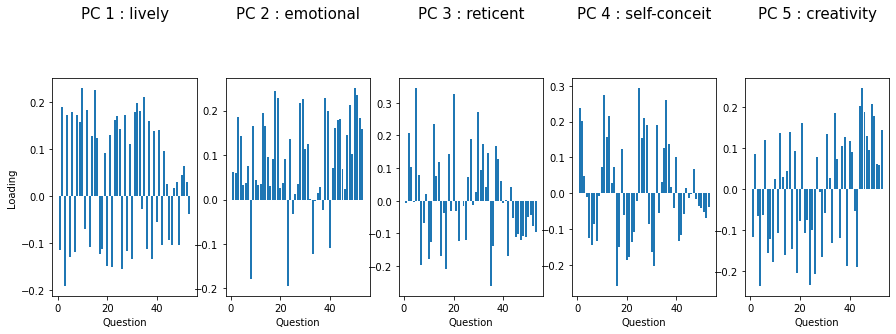

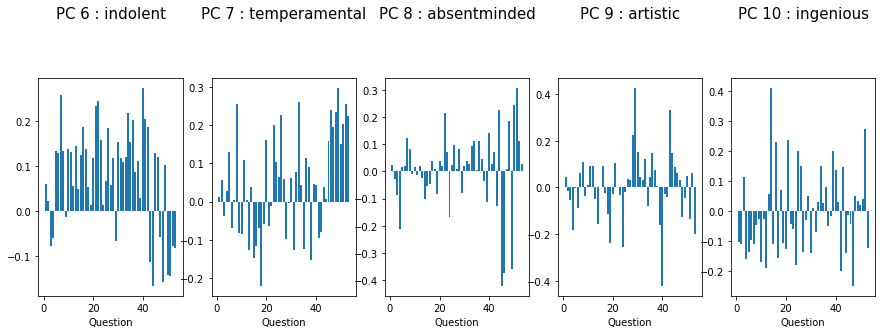

In [14]:
#plotting first 10 loadings
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,4))

for i in range(0,5):    
    ax[i].set_title('PC {}{}{}'.format(i+1 ," : ", semantic[i]), pad=60, fontdict = {'fontsize': 15})
    ax[i].bar(np.linspace(1,53,53),loadings[i,:]*-1)
    ax[i].set_xlabel('Question')
    if i == 0:
        ax[i].set_ylabel('Loading')
plt.show()
    
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,4))
for i in range(0,5):    
    ax[i].set_title('PC {}{}{}'.format(i+5+1 ," : ", semantic[i+5]), pad=60, fontdict = {'fontsize': 15})
    ax[i].bar(np.linspace(1,53,53),loadings[i+5,:]*-1)
    ax[i].set_xlabel('Question')
    if i == 5:
        ax[i].set_ylabel('Loading')
plt.show()


### 2) 
Plot the data from columns 421-474 in the new coordinate system, where each dot represents a person, and the axes represent the factors you found in 1). Hint: If you identified more than 2 meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability.


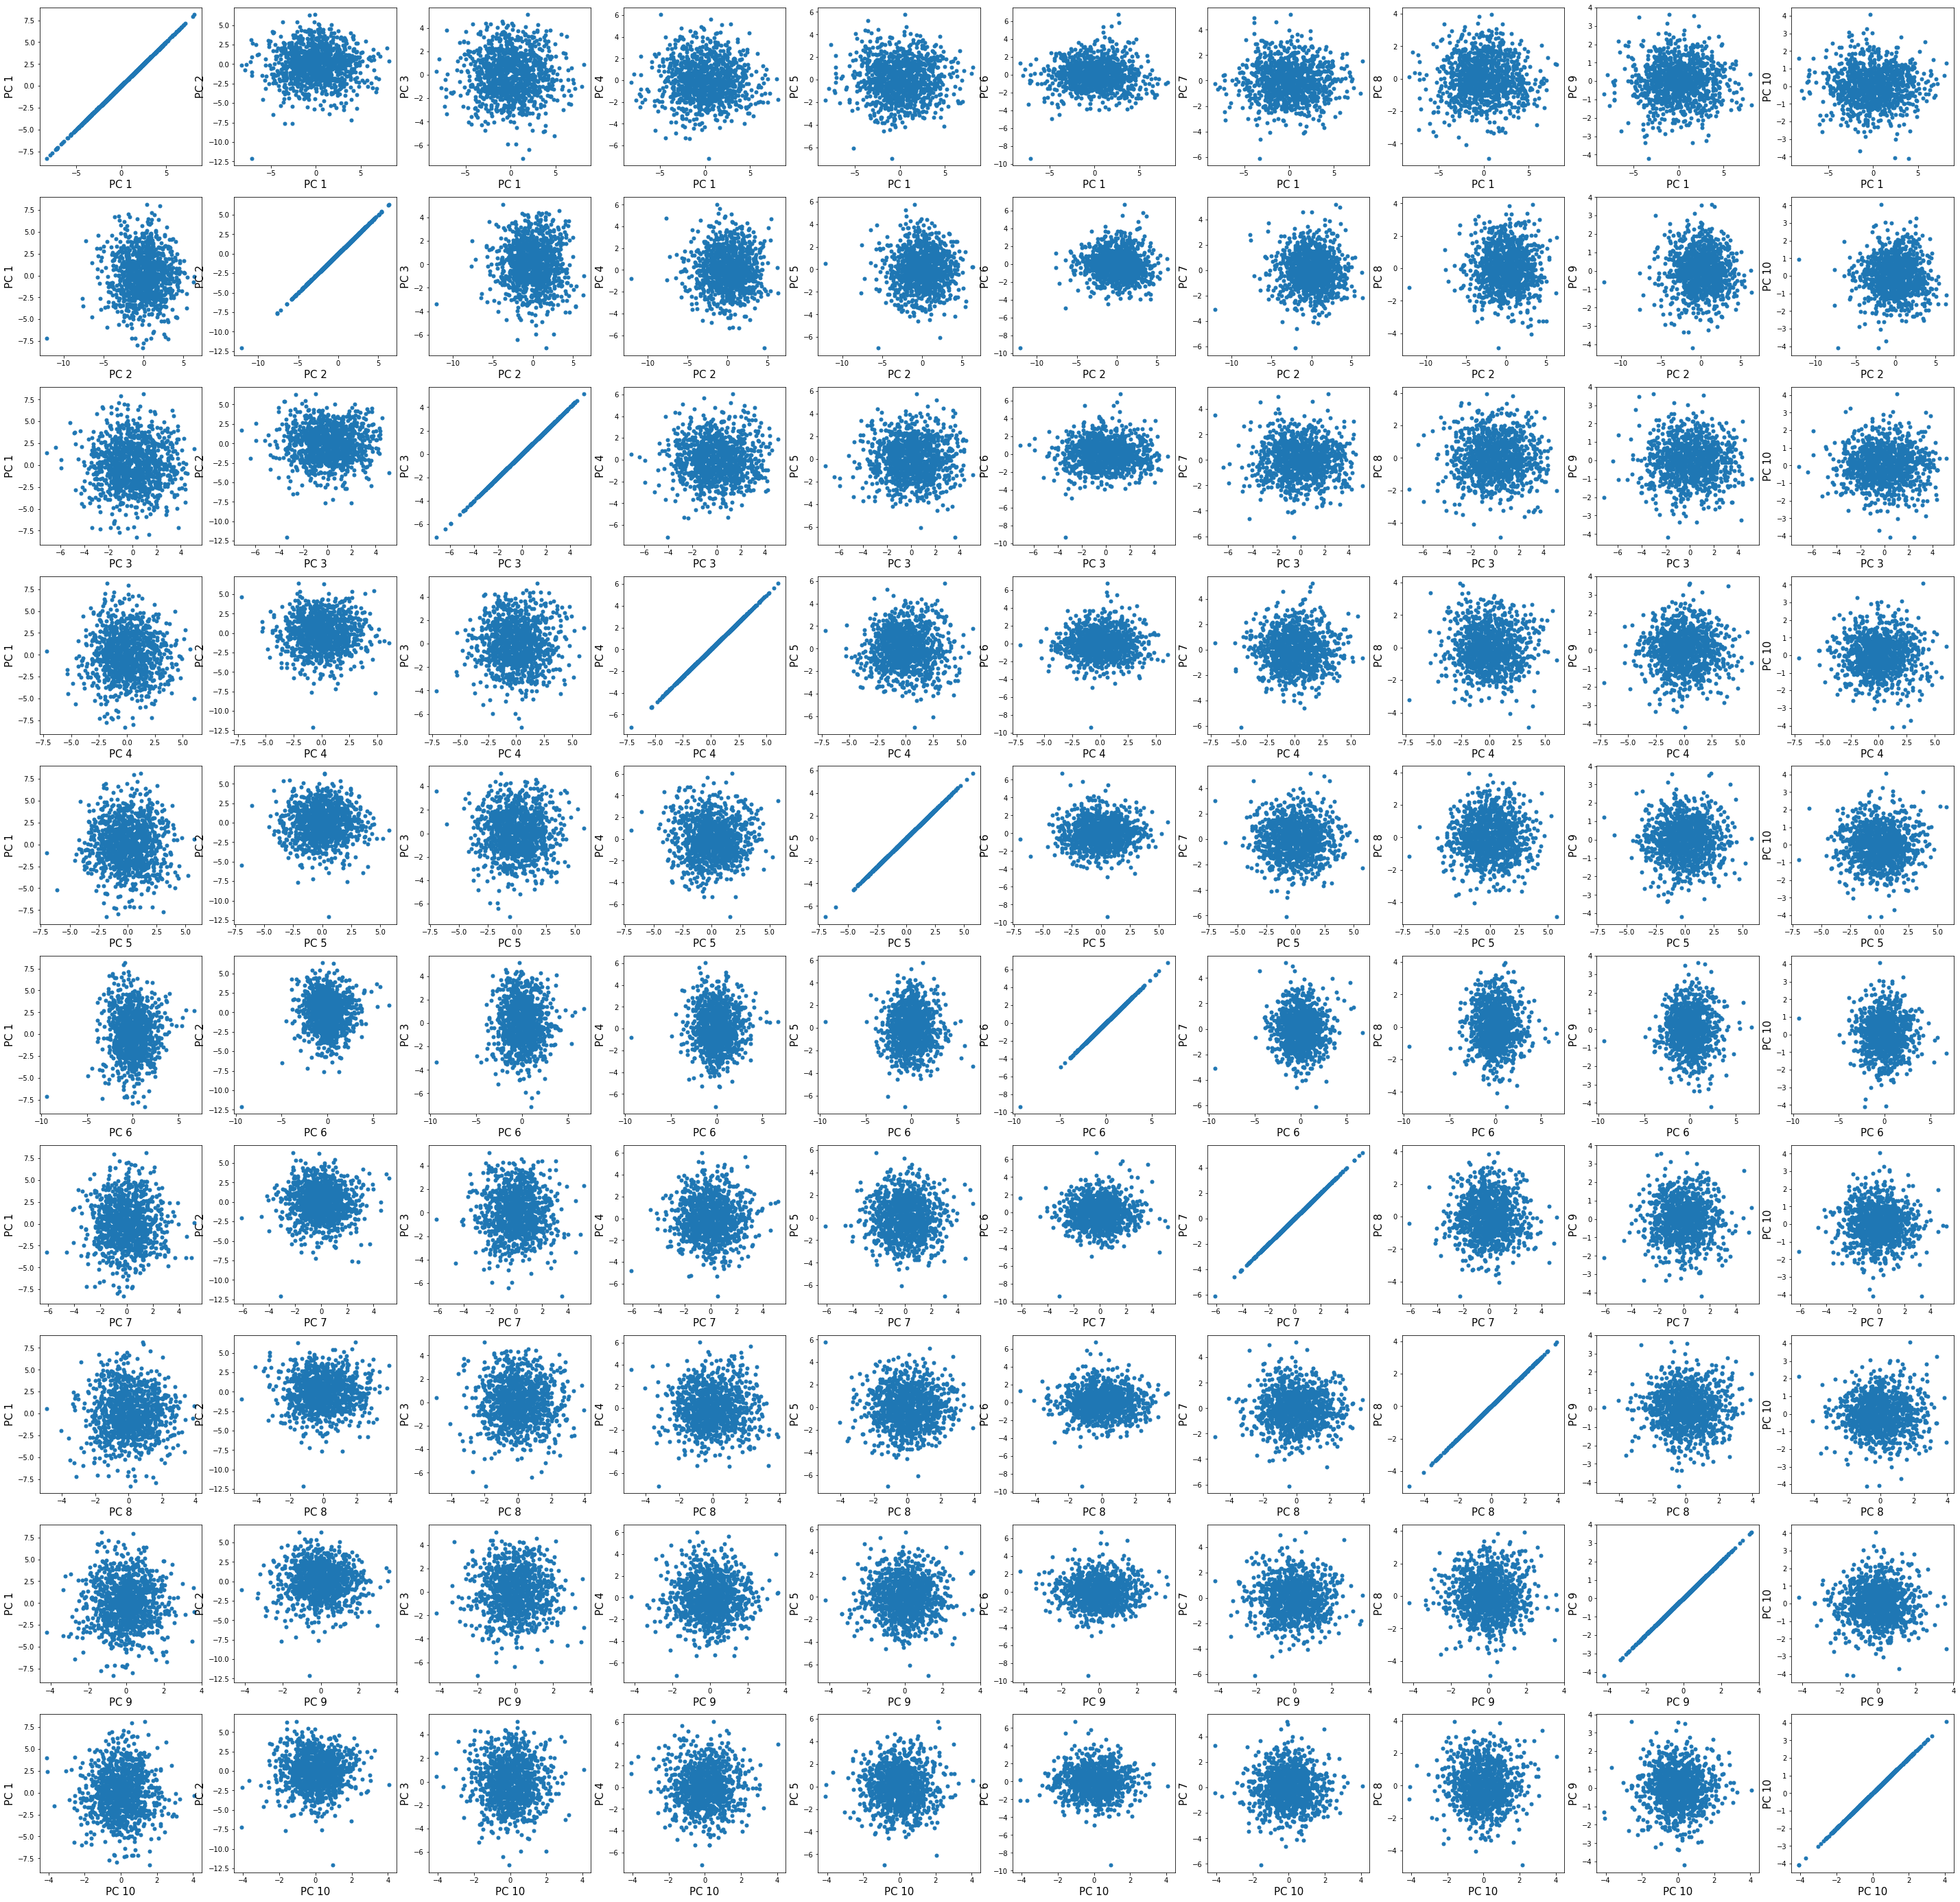

In [15]:
f_names = ["PC "+str(i) for i in range(1,11)]

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(50,50))

for i in range(10):    
    for j in range(10):
        ax[i][j].plot(rotatedData.loc[:,i],rotatedData.loc[:,j],'o',markersize=5)#rotatedData is already *-1 when it was created
        ax[i][j].set_xlabel(f_names[i], fontsize=15)
        ax[i][j].set_ylabel(f_names[j], fontsize=15)


### 3) 
Identify clusters in this new space. Use a method of your choice (e.g. kMeans, DBScan, hierarchical clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user is part of.


In [16]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


# Store our transformed data:
X = np.transpose(np.array([rotatedData.loc[:,0],rotatedData.loc[:,1]]))#rotatedData is already *-1 when it was created
numClusters = 9

def kMeans_silhouette(arr):
     # how many clusters are we looping over? (from 2 to 10)
    Q = np.empty([numClusters,1]) # init container to store sums
    Q[:] = np.NaN # convert to NaN

    # Compute kMeans:
    for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
        kMeans = KMeans(n_clusters = int(ii), random_state=111).fit(arr) # compute kmeans with fixed state for reproducibility
        cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
        cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
        s = silhouette_samples(arr, cId) # compute the mean silhouette coefficient of all samples
        Q[ii-2] = sum(s) # take sum
    return Q

Q_X = kMeans_silhouette(X)


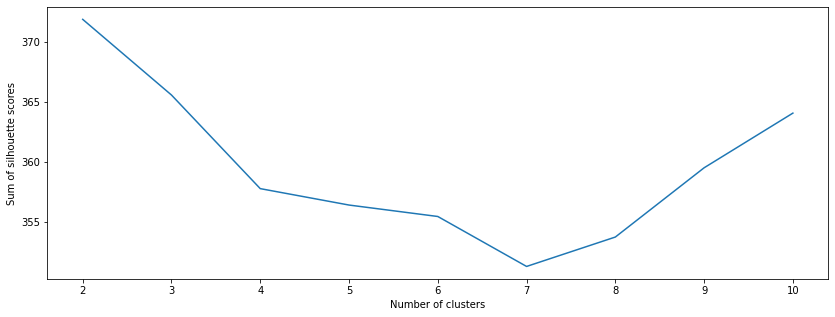

In [17]:
#%% Plot this to make it clearer what is going on
plt.figure(figsize = (14,5))
plt.plot(np.linspace(2,10,numClusters),Q_X)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()


In [18]:
def kMeans_optimal(arr, num_clusters):
     # how many clusters are we looping over? (from 2 to 10)
    Q = np.empty([num_clusters,1]) # init container to store sums
    Q[:] = np.NaN # convert to NaN

    # Compute kMeans for the given n_clusters:
    kMeans = KMeans(n_clusters = num_clusters, random_state=111).fit(arr) # compute kmeans with fixed state for reproducibility
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(arr, cId) # compute the mean silhouette coefficient of all samples
    Q[0] = sum(s) # take sum
    return kMeans, cId,cCoords,s, Q

kMeans_X, cId_X, cCoords_X, s_X, Q_X = kMeans_optimal(X, 2)

np.unique(cId_X)

array([0, 1], dtype=int32)

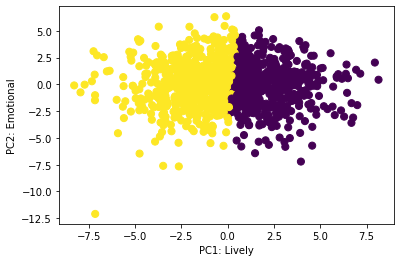

In [19]:
#%% Now let's plot and color code the data based on the optimal cluster we found using silhouette method

from sklearn.metrics import pairwise_distances_argmin

def KMeans(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = KMeans(X, 2)
plt.xlabel('PC1: Lively')
plt.ylabel('PC2: Emotional')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');


### 4)
Use these principal components and/or clusters you identified to build a classification model of your
choice (e.g. logistic regression, kNN, SVM, random forest), where you predict the movie ratings of all movies from the personality factors identified before. Make sure to use cross-validation methods to avoid overfitting and assess the accuracy of your model by stating its AUC.

I recoded the movie ratings as high (1) or low (0) based using median as a threshold. Then fitted the first transformed data using the first 10 principal component to predict the 400 movie ratings. I used 10 fold cross validation to avoid overfitting. I specifically used stratified cross validation so that the ratio between two classes (high vs low) is preserved. Doing so the average accuracy for the 400 movie ratings was 0.9103 (0.89622) and the average auc score was 0.6016 (0.5935). I looked at the breakdown of the scores and found that 65% of the movies have great accuracy (>0.90) and only 10% of the movies have good auc-roc (>0.70). 


In [20]:
movieratings_df = df.iloc[:, :400]
# fill missing data with the median value
movieratings_df.fillna(movieratings_df.median(), inplace=True)
print(movieratings_df.shape)
movieratings_df.head()


(1097, 400)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.5,2.0,4.0,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,4.0,0.5,2.5,2.5,2.5,2.0,2.5
1,2.5,2.0,1.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,4.0,2.5,2.5,2.5,2.0,2.5
2,2.5,2.0,3.5,3.0,3.0,3.0,2.5,3.0,2.5,3.0,...,3.0,3.5,3.0,3.0,3.5,2.5,2.5,2.5,2.0,2.5
3,2.5,2.0,2.0,3.0,3.0,3.0,2.5,3.0,2.5,4.0,...,3.0,3.0,3.0,3.0,2.5,2.5,2.5,2.5,2.0,2.5
4,2.5,2.0,3.5,3.0,0.5,3.0,0.5,1.0,2.5,0.0,...,2.5,3.5,3.0,3.0,3.5,2.5,2.5,1.5,2.0,2.5


In [21]:
for i in movieratings_df.columns:
    median_c = movieratings_df[i].median()
    movieratings_df[i] = np.where(movieratings_df[i] > median_c, 1, 0)

In [22]:
predictors = pd.DataFrame(rotatedData.loc[:,:9])
predictors.columns = ["lively", "emotional", "reticent", "self-conceit", "creativity", "indolent", "temperamental", "absentminded","artistic", "ingenious"]
print(predictors.shape)
predictors.head()


(1097, 10)


,lively,emotional,reticent,self-conceit,creativity,indolent,temperamental,absentminded,artistic,ingenious
0,-1.421647,0.003626,1.013982,-1.090947,-3.635629,-0.638045,4.586498,0.642820,2.635746,1.951169
1,-1.335319,-0.874773,1.811695,-1.951896,-0.838969,-0.040798,1.162300,2.193658,2.266868,-1.100870
2,-0.231484,1.098985,-1.165078,-1.311073,1.096029,-0.446921,-0.014464,1.113064,-0.139730,-0.691933
3,1.907821,1.825072,1.774959,-0.098473,-0.342190,-1.640752,-3.576347,-0.460274,0.518861,-1.001117
4,-2.460307,1.138841,-1.560553,0.144555,1.117730,-0.183134,-0.468212,0.887601,0.168056,-1.113979


In [23]:
movie_df = pd.concat([movieratings_df, predictors], axis=1)
movie_df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,lively,emotional,reticent,self-conceit,creativity,indolent,temperamental,absentminded,artistic,ingenious
0,0,0,1,0,0,0,0,0,0,0,...,-1.421647,0.003626,1.013982,-1.090947,-3.635629,-0.638045,4.586498,0.642820,2.635746,1.951169
1,0,0,0,0,0,0,0,0,0,0,...,-1.335319,-0.874773,1.811695,-1.951896,-0.838969,-0.040798,1.162300,2.193658,2.266868,-1.100870
2,0,0,0,0,0,0,0,0,0,0,...,-0.231484,1.098985,-1.165078,-1.311073,1.096029,-0.446921,-0.014464,1.113064,-0.139730,-0.691933
3,0,0,0,0,0,0,0,0,0,1,...,1.907821,1.825072,1.774959,-0.098473,-0.342190,-1.640752,-3.576347,-0.460274,0.518861,-1.001117
4,0,0,0,0,0,0,0,0,0,0,...,-2.460307,1.138841,-1.560553,0.144555,1.117730,-0.183134,-0.468212,0.887601,0.168056,-1.113979


In [24]:
movieratings_df_count = movieratings_df.apply(lambda x: x.value_counts()).T
movieratings_df_count.head()

,0,1
The Life of David Gale (2003),1068.0,29.0
Wing Commander (1999),1067.0,30.0
Django Unchained (2012),954.0,143.0
Alien (1979),988.0,109.0
Indiana Jones and the Last Crusade (1989),946.0,151.0


<AxesSubplot:ylabel='0'>

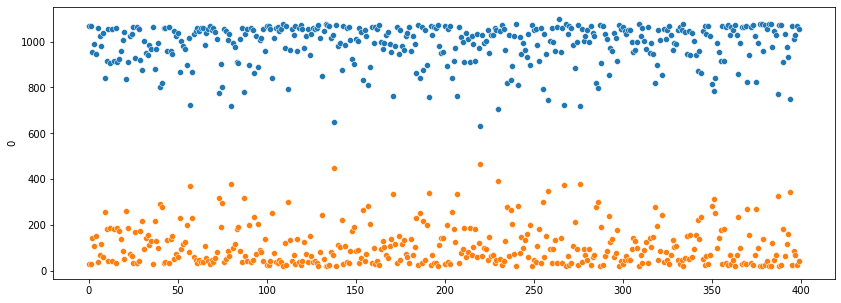

In [25]:
plt.figure(figsize = (14,5))

sn.scatterplot(x = range(0,400), y = movieratings_df_count[0])
sn.scatterplot(x = range(0,400), y = movieratings_df_count[1])

Only a handful of movie ratings are in the middle group that is around 40% of the ratings marked the movie as good rating or bad ratings. Most of the movies have a high proportion of being marked as a good ratings or a bad ratings. This is supported by the cluster analysis I did on the individual's behaviour questions. If there are two clusters of individuals then if they rate the movie similarly then we would see two types of pattern in how movies are rated. I say this because next I performed logistic regression and obtained a good accuracy 91% and AUC-ROC of 0.60. Those numbers are average for all of the 400 movies. My model performed poorly on some of the movies, which affected the average accuracy and AUC-ROC.   


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

roc_auc_l, accuracy_arr_l = [], []

for c in movieratings_df.columns:
    # prepare the cross-validation procedure
    cv = StratifiedKFold(n_splits=10, random_state=11, shuffle=True) 
    #StratifiedKFold will make sure that the proportion between two classes are preserved during split
    # create model
    model = LogisticRegression()
    # evaluate model
    accuracy_scores = cross_val_score(model, predictors, movieratings_df[c], scoring='accuracy', cv=cv, n_jobs=-1)
    roc_scores = cross_val_score(model, predictors, movieratings_df[c], scoring='roc_auc', cv=cv, n_jobs=-1)
    # report performance
    accuracy_arr_l.append(accuracy_scores)
    roc_auc_l.append(roc_scores)


In [57]:
print("Average accuracy:", np.nanmean(accuracy_arr_l))
print("Average AUC-ROC score:", np.nanmean(roc_auc_l))

Average accuracy: 0.9000827966496726
Average AUC-ROC score: 0.6120694062246987


In [28]:
acc_df = pd.DataFrame([np.mean(accuracy_arr_l, axis = 1), np.mean(roc_auc_l, axis = 1)]).T
acc_df.columns = ["accuracy", "auc-roc"]
acc_df.describe()

,accuracy,auc-roc
count,399.000000,399.000000
mean,0.900083,0.612069
std,0.080200,0.062118
min,0.572444,0.463395
25%,0.866468,0.571370
50%,0.927990,0.605048
75%,0.963082,0.642434
max,0.980859,0.823278


In [29]:
acc_df["good_acc"] = np.where(acc_df["accuracy"] > 0.90, 1, 0)
acc_df["good_auc-roc"] = np.where(acc_df["auc-roc"] > 0.70, 1, 0)
acc_df.head()

,accuracy,auc-roc,good_acc,good_auc-roc
0,0.973570,0.639076,1,0
1,0.970826,0.721772,1,1
2,0.869650,0.579054,0,0
3,0.899733,0.612427,0,0
4,0.862352,0.573024,0,0


In [30]:
print((acc_df["good_acc"].value_counts()/len(acc_df)))
print((acc_df["good_auc-roc"].value_counts()/len(acc_df)))


1    0.6225
0    0.3775
Name: good_acc, dtype: float64
0    0.9025
1    0.0975
Name: good_auc-roc, dtype: float64


In [31]:
#movie titles with good AUC-ROC scores
df.columns[acc_df[acc_df["good_auc-roc"] == 1].index.tolist()]

Index(['Wing Commander (1999)', 'North (1994)',
       'The King of Marvin Gardens (1972)', 'The 51st State (2001)',
       'Moonraker (1979)', 'Sexy Beast (2000)', 'Barb Wire (1996)',
       'Speed 2: Cruise Control (1997)', 'Blazing Saddles (1974)',
       'The Doom Generation (1995)', 'Billy Jack (1971)',
       'The Silencers (1966)', 'Can't Hardly Wait (1998)',
       'Father's Day (1997)', 'Boomerang (1992)', 'In America (2002)',
       'Broken Arrow (1996)', 'Battlefield Earth (2000)', 'De-Lovely (2004)',
       'I.Q. (1994)', 'The Bandit (1996)', 'Best Laid Plans (1999)',
       'Congo (1995)', 'Gigli (2002)', 'Ran (1985)', 'Double Jeopardy (1999)',
       'The Big Lebowski (1998)', 'Heavy Traffic (1973)',
       'The Final Conflict (1981)', 'Cocktail (1988)', 'Red Sonja (1985)',
       'Freddy Got Fingered (2001)', 'The Station Agent (2003)',
       'The Lookout (2007)', '21 Grams (2003)', 'On Golden Pond (1981)',
       'Gods and Generals (2003)', 'My Father and My Son (2005)

In [32]:
#movie titles with poor accuracy
df.columns[acc_df[acc_df["accuracy"] < 0.70].index.tolist()]

Index(['Shrek 2 (2004)', 'Avatar (2009)', 'Finding Nemo (2003)',
       'Toy Story 3 (2010)', 'Spider-Man (2002)', 'Forrest Gump (1994)',
       'The Lion King (1994)', 'Harry Potter and the Sorcerer's Stone (2001)',
       'Harry Potter and the Deathly Hallows: Part 2 (2011)',
       'Monsters  Inc.(2001)', 'Toy Story (1995)',
       'Harry Potter and the Goblet of Fire (2005)',
       'Harry Potter and the Chamber of Secrets (2002)'],
      dtype='object')

In [33]:
#movie titles with poor AUC-ROC
df.columns[acc_df[acc_df["auc-roc"] < 0.50].index.tolist()]

Index(['Let the Right One In (2008)', 'The Others (2001)', 'Platoon (1986)',
       'JFK (1991)',
       'Indiana Jones and the Kingdom of the Crystal Skull (2008)',
       'Ace Ventura: When Nature Calls (1995)', 'War Games (1983)',
       'Child's Play (1988)', 'I Robot (2004)', 'The Sting (1973)'],
      dtype='object')

Text(0.5, 1.0, 'AUC-ROC score of logistic regression on 400 movie ratings')

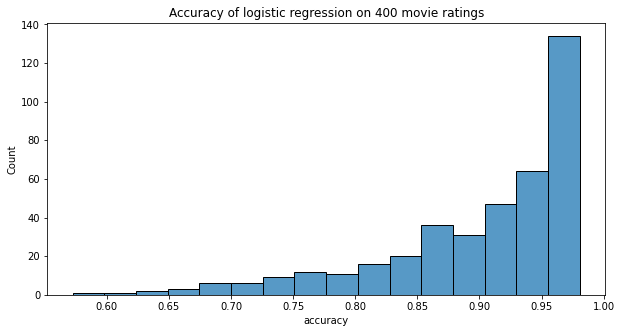

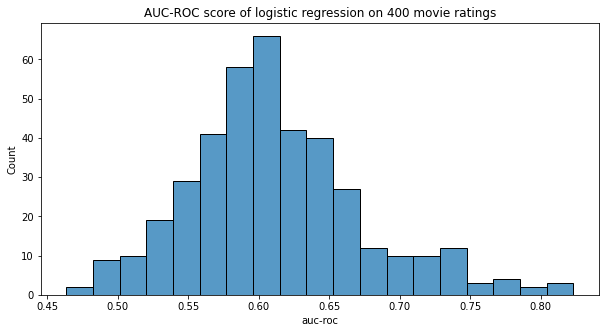

In [34]:
plt.figure(figsize=(10,5))
sn.histplot(acc_df["accuracy"])
plt.title("Accuracy of logistic regression on 400 movie ratings")

plt.figure(figsize=(10,5))
sn.histplot(acc_df["auc-roc"])
plt.title("AUC-ROC score of logistic regression on 400 movie ratings")


### 5) 
Create a neural network model of your choice to predict movie ratings, using information from all 477 columns. Make sure to comment on the accuracy of this model.

In [35]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
from sklearn.model_selection import train_test_split


In [36]:
cnn_df = df.copy()
cnn_df.fillna(cnn_df.median(), inplace=True)
#cnn_df = stats.zscore(cnn_df)

print(cnn_df.shape)
cnn_movieratings =cnn_df.iloc[:,:400]
cnn_predictors =cnn_df.iloc[:,400:]

print(cnn_movieratings.shape)
print(cnn_predictors.shape)

#standardize just the predictors
cnn_predictors_zscored = stats.zscore(cnn_predictors)



(1097, 477)
(1097, 400)
(1097, 77)


In [37]:
from tqdm import tqdm

class myCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(myCNNModel, self).__init__()
        self.conv1=nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2=nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.linear=nn.Linear(1216, num_classes)
        self.maxpool=nn.MaxPool1d(kernel_size=2)
        self.relu = nn.ReLU()
    def forward(self, x):
        #print("initial x:",x.shape)
        x = self.relu(self.conv1(x))
        #print("relu:",x.shape)
        x = self.maxpool(x)
        #print("max pool:",x.shape)
        x = self.relu(self.conv2(x))
        #print("relu:",x.shape)
        x = self.maxpool(x)
        #print("max pool:",x.shape)
        x = x.view(x.size(0),-1)
        #print("view :",x.shape)
        x = self.linear(x)
        #print("linear:",x.shape)
        return x
    
def first_CNNModel(cnn_predictors, cnn_movieratings):
    accuracy_arr = []
    for i in range(400):
        seed = 111 
        torch.manual_seed(seed)
        #split the data
        cnn_ratings_i = cnn_movieratings.iloc[:,i]
        X_train, X_test, y_train, y_test = train_test_split(cnn_predictors, cnn_ratings_i,
                                                            test_size=0.2, random_state=0)
                                                            #stratify=cnn_ratings_i)
        # print(X_train.shape, X_test.shape)
        train_data = X_train.values.reshape(-1, 77)
        train_labels = y_train.values
        #  print(train_data.shape, train_labels.shape)
        test_data = X_test.values.reshape(-1, 77)
        test_labels = y_test.values
        #     print(test_data.shape, test_labels.shape)
        model=myCNNModel(10)
        model.train()
        loss_criterion=CrossEntropyLoss()
        optimizer=Adam(model.parameters(), lr=1e-2)

        # Creating tensors
        train_data_tensor = torch.FloatTensor(train_data).unsqueeze(1)
        train_label_tensor = torch.LongTensor(train_labels)
        test_data_tensor = torch.FloatTensor(test_data).unsqueeze(1)
        test_label_tensor = torch.LongTensor(test_labels)
        epochs=3
        acc_arr= []
        for epoch in range(epochs):
            loss_arr=[]
            for b_idx in range(0, len(train_data_tensor), 10):
                optimizer.zero_grad()
                images = train_data_tensor[b_idx:b_idx+10]
                labels = train_label_tensor[b_idx:b_idx+10]
                output = model(images)
                loss = loss_criterion(output, labels)
                loss.backward()
                optimizer.step()
                loss_arr.append(loss.item())
        #         print("Loss for Epoch: %d: %.3f" % (epoch, np.average(loss_arr)))

            model.eval()
            test_outputs=[]
            for img in tqdm(test_data_tensor):
                out=model(img.unsqueeze(0))
                test_outputs.append(np.argmax(out.detach().numpy(), axis=-1))

            test_outputs=np.squeeze(np.stack(test_outputs))
            acc= 100*np.sum(test_outputs==test_labels)/len(test_outputs)

            #print('{}th movie: Accuracy on Test Data: {:.3f}'.format(0, 100.0*acc))
            acc_arr.append(acc)
        accuracy_arr.append(np.mean(acc_arr).round(1))
    return accuracy_arr

In [38]:
accuracy_arr1 = first_CNNModel(cnn_predictors, cnn_movieratings)

100%|██████████| 220/220 [00:00<00:00, 3822.96it/s]


100%|██████████| 220/220 [00:00<00:00, 3952.43it/s]


100%|██████████| 220/220 [00:00<00:00, 3905.06it/s]


100%|██████████| 220/220 [00:00<00:00, 3896.06it/s]


In [39]:
print("Average accuray", np.mean(accuracy_arr1))

Average accuray 35.8395


Text(0, 0.5, 'Accuracy')

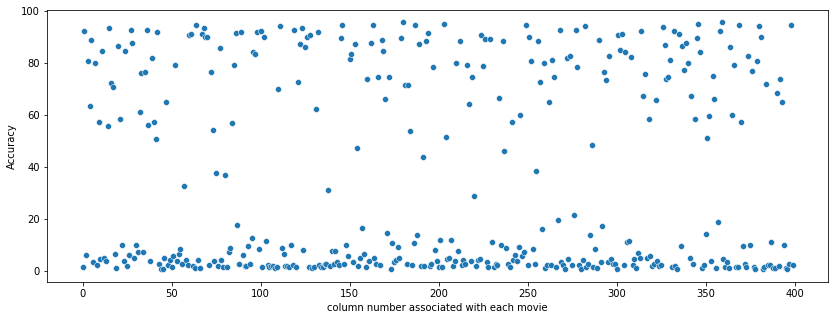

In [40]:
plt.figure(figsize = (14,5))

sn.scatterplot(x = range(0,400), y = accuracy_arr1)
plt.xlabel('column number associated with each movie')
plt.ylabel('Accuracy')

In [41]:
accuracy_arr2 = first_CNNModel(cnn_predictors_zscored, cnn_movieratings)

100%|██████████| 220/220 [00:00<00:00, 4031.94it/s]


100%|██████████| 220/220 [00:00<00:00, 3839.50it/s]


100%|██████████| 220/220 [00:00<00:00, 3807.48it/s]


100%|██████████| 220/220 [00:00<00:00, 3883.48it/s]


Average accuray 35.824


Text(0, 0.5, 'Accuracy')

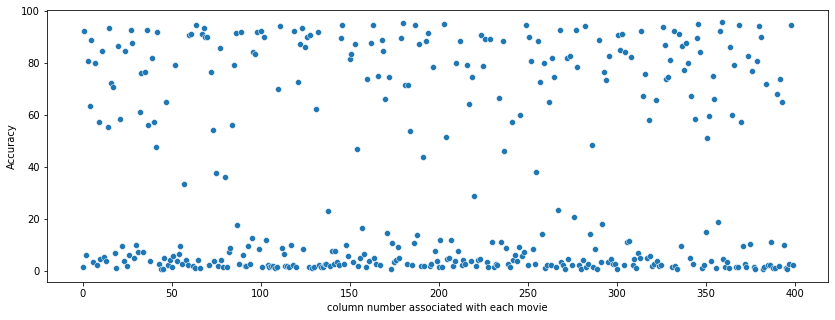

In [42]:
print("Average accuray", np.mean(accuracy_arr2))

plt.figure(figsize = (14,5))
sn.scatterplot(x = range(0,400), y = accuracy_arr2)
plt.xlabel('column number associated with each movie')
plt.ylabel('Accuracy')

### First just check how a cnn model performs just for the first movie "The Life of David Gale (2003)"

For the first movie, I chose to run 1 dimensional cnn models with three learning rates [1e-2, 1e-3, 1e-4] for 3 epochs and the results differed based on how I cleaned and selected the movie ratings and predictors. There are two main cases based on the number of classes to be predicted. 

# Case I: predicting 10 outcomes

At first I ran my models to predict actual ratings [0, 0.5, ..., 4.5, 5]

*Note: accuracy by random guess will be 10% if we are predicting 10 outputs*

Within each case, I performed 4 different types of data cleaning and selection. Details and results of three learning rates [1e-2, 1e-3, 1e-4] below:

1) fill all missing data with median 

    accuracy for Case I: [0.5, 0.5, 0.5] 
    
Those accuracies are worse than random guess. If we look at the predicted ouputs of the test data (20% of original data = 220) and their actual values, we see that only 2 was predicted by the model and there is only 1 label that is 2. Therefore, 1/220*100 = 0.5. 

2) fill all missing data with median and standardize predictors

    accuracy for Case I: [0.5, 0.5, 0.5] worse than random guess
   
Same results as 1). 
    
3) fill only predictors with median and remove missing ratings

    accuracy: [10.4, 10.4, 2.07] 
    
First two learning rates are better than learnig rate of 1e-4, but no better than random guess. The accuracy of each epoch tells us increasing epoch doesn't always improve the accuracy in each step: first learning rate [12.5, 6.2, 12.5], second learning rate [18.8, 6.2, 6.2], and third learning rate [0.0, 0.0, 6.2]]. 

    
4) fill only predictors with median, standardize them and remove missing ratings

    accuracy: [10.4, 16.7, 8.33] 
    
Accuracy for the learning rate of 1e-3 slightly better than random guess, but not good enough. 
 

In [43]:
def run_model(predictor,output, n_epochs, learning_rate, n_classes):
    accuracy_arr = []
    seed = 111
    torch.manual_seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(predictor,output,test_size=0.2, random_state=0, stratify=output)
    train_data = X_train.values.reshape(-1, 77)
    train_labels = y_train.values
    test_data = X_test.values.reshape(-1, 77)
    test_labels = y_test.values
    train_data_tensor = torch.FloatTensor(train_data).unsqueeze(1)
    train_label_tensor = torch.LongTensor(train_labels)
    test_data_tensor = torch.FloatTensor(test_data).unsqueeze(1)
    test_label_tensor = torch.LongTensor(test_labels)

    train_data = X_train.values.reshape(-1, 77)
    train_labels = y_train.values
    test_data = X_test.values.reshape(-1, 77)
    test_labels = y_test.values
    model=myCNNModel(n_classes)
    model.train()
    loss_criterion=CrossEntropyLoss()
    optimizer=Adam(model.parameters(), lr=learning_rate)

    # Creating tensors
    train_data_tensor = torch.FloatTensor(train_data).unsqueeze(1)
    train_label_tensor = torch.LongTensor(train_labels)
    test_data_tensor = torch.FloatTensor(test_data).unsqueeze(1)
    test_label_tensor = torch.LongTensor(test_labels)

    epochs=n_epochs
    for epoch in range(epochs):
        loss_arr=[]
        for b_idx in range(0, len(train_data_tensor), 10):
            optimizer.zero_grad()
            images = train_data_tensor[b_idx:b_idx+10]
            labels = train_label_tensor[b_idx:b_idx+10]
            output = model(images)
            loss = loss_criterion(output, labels)
            loss.backward()
            optimizer.step()
            loss_arr.append(loss.item())
    #         print("Loss for Epoch: %d: %.3f" % (epoch, np.average(loss_arr)))
        model.eval()
        test_outputs=[]
        for img in tqdm(test_data_tensor):
            out=model(img.unsqueeze(0))
            test_outputs.append(np.argmax(out.detach().numpy(), axis=-1))

        test_outputs=np.squeeze(np.stack(test_outputs))
        acc=round(100.0*np.sum(test_outputs==test_labels)/len(test_outputs),1)
        #print('{}th movie: Accuracy on Test Data: {:.3f}'.format(i, acc))
        accuracy_arr.append(acc)
    return test_labels, test_outputs, accuracy_arr

def store_results(predictors_df, ratings_arr, n_epochs, n_classes):
    model_acc = []
    model_label = []
    model_output = []
    for i in [1e-2, 1e-3, 1e-4]:
        label, output, acc = run_model(predictors_df, ratings_arr, n_epochs, i, n_classes)
        model_label.append(label)
        model_output.append(output)
        model_acc.append(acc)
    return model_label, model_output, model_acc 

def make_2_classes(df, movie_i):
    df_c = df.copy()
    df_c.iloc[:,movie_i] = np.where(df_c.iloc[:,movie_i] >= df_c.iloc[:,movie_i].median(), 
                                      1,
                                    0)
    return df_c.iloc[:,movie_i]

def make_3_classes(df, movie_i):
    df_c = df.copy()
    df_c.iloc[:,movie_i] = np.where(df_c.iloc[:,movie_i] > df_c.iloc[:,movie_i].median(), 
                                      2,
                                      np.where(df_c.iloc[:,movie_i] == df_c.iloc[:,movie_i].median(), 
                                               1,
                                               0))
    return df_c.iloc[:,movie_i]

def count_output_label(actual_label, model_output):
    learning_rates = [1e-2, 1e-3, 1e-4]
    unique, counts = np.unique(actual_label[0], return_counts=True) # same labels for all three learing rates so just print first
    print("actual labels:", dict(zip(unique, counts)))
    for i in range(0,3):
        unique, counts = np.unique(model_output[i], return_counts=True)
        print("model output", learning_rates[i], ":", dict(zip(unique, counts)))
        

### 1) fill all missing data with median

In [44]:
df1_1 = df.copy()
df1_1.fillna(df1_1.median(), inplace = True)
cnn_predictors1_1 = df1_1.iloc[:,400:]
movie_ratings1_1 = df1_1.iloc[:,0]
model1_label, model1_output, model1_acc = store_results(cnn_predictors1_1,movie_ratings1_1, n_epochs =3, n_classes=10)
model1_acc         

100%|██████████| 220/220 [00:00<00:00, 3833.15it/s]


[[0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]

### 2) fill all missing data with median and standardize predictors


In [45]:
df1_2 = df.copy()
df1_2.fillna(df1_2.median(), inplace = True)
cnn_predictors1_2 = df1_2.iloc[:,400:]
cnn_predictors1_2 = stats.zscore(cnn_predictors1_2)
movie_ratings1_2 = df1_2.iloc[:,0]
model2_label, model2_output, model2_acc = store_results(cnn_predictors1_2, movie_ratings1_2, 
                                                        n_epochs =3, n_classes=10)
model2_acc

100%|██████████| 220/220 [00:00<00:00, 3721.95it/s]


[[0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]

### 3) fill only predictors with median and remove missing ratings

In [46]:
df1_3 = df.copy()
df1_3 = df1_3[df1_3["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_3 = df1_3.iloc[:,400:]
cnn_predictors1_3.fillna(cnn_predictors1_3.median(), inplace = True)
movie_ratings1_3 = df1_3.iloc[:,0]

model3_label, model3_output, model3_acc = store_results(cnn_predictors1_3,movie_ratings1_3, 
                                                        n_epochs =3, n_classes=10)
model3_acc

100%|██████████| 16/16 [00:00<00:00, 3341.74it/s]


[[12.5, 6.2, 12.5], [18.8, 6.2, 6.2], [0.0, 0.0, 6.2]]

### 4) fill only predictors with median, standardize them and remove missing ratings

In [47]:
df1_4 = df.copy()
df1_4 = df1_4[df1_4["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_4 = df1_4.iloc[:,400:]
cnn_predictors1_4.fillna(cnn_predictors1_4.median(), inplace = True)
cnn_predictors1_4 = stats.zscore(cnn_predictors1_4)
movie_ratings1_4 = df1_4.iloc[:,0]
model4_label, model4_output, model4_acc = store_results(cnn_predictors1_4,movie_ratings1_4, 
                                                        n_epochs =3, n_classes=10)
model4_acc

100%|██████████| 16/16 [00:00<00:00, 3038.94it/s]


[[12.5, 6.2, 12.5], [18.8, 18.8, 12.5], [0.0, 12.5, 12.5]]

Average accuracy for three learning rates (1e-2, 1e-3, 1e-4) and occurences of each outcomes in actual label vs predicted by the model

In [48]:
print("Predicting 10 outcomes")
print("Model 1")
print(np.mean(model1_acc, axis = 1).round(1))
print(count_output_label(model1_label, model1_output))
print("\nModel 2")
print(np.mean(model2_acc, axis = 1).round(1))
print(count_output_label(model2_label, model2_output))
print("\nModel 3")
print(np.mean(model3_acc, axis = 1).round(1))
print(count_output_label(model3_label, model3_output))
print("\nModel 4")
print(np.mean(model4_acc, axis = 1).round(1))
print(count_output_label(model4_label, model4_output))

Predicting 10 outcomes
Model 1
[0.5 0.5 0.5]
actual labels: {0.0: 1, 0.5: 2, 1.0: 2, 1.5: 2, 2.0: 1, 2.5: 207, 3.0: 3, 3.5: 1, 4.0: 1}
model output 0.01 : {2: 220}
model output 0.001 : {2: 220}
model output 0.0001 : {2: 220}
None

Model 2
[0.5 0.5 0.5]
actual labels: {0.0: 1, 0.5: 2, 1.0: 2, 1.5: 2, 2.0: 1, 2.5: 207, 3.0: 3, 3.5: 1, 4.0: 1}
model output 0.01 : {2: 220}
model output 0.001 : {2: 220}
model output 0.0001 : {2: 220}
None

Model 3
[10.4 10.4  2.1]
actual labels: {0.0: 1, 0.5: 2, 1.0: 2, 1.5: 2, 2.0: 1, 2.5: 2, 3.0: 3, 3.5: 2, 4.0: 1}
model output 0.01 : {0: 1, 1: 10, 3: 4, 4: 1}
model output 0.001 : {2: 2, 3: 14}
model output 0.0001 : {2: 16}
None

Model 4
[10.4 16.7  8.3]
actual labels: {0.0: 1, 0.5: 2, 1.0: 2, 1.5: 2, 2.0: 1, 2.5: 2, 3.0: 3, 3.5: 2, 4.0: 1}
model output 0.01 : {1: 9, 2: 1, 3: 6}
model output 0.001 : {0: 1, 1: 8, 2: 3, 3: 4}
model output 0.0001 : {0: 7, 1: 4, 2: 4, 3: 1}
None


# Case II: predicting binary outcome

I converted the movie ratings into binary outcome using median as a threshold [1 if > median and 0 otherwise]

*Note: accuracy by random guess will be 50% if we are predicting 2 outputs [0, 1] with equal proportion.*

1) fill all missing data with median 

    accuracy for Case II: [96.8 96.8 96.8] 

The accuracy looks good, but in reality it is not. In this movie 1021 row (93%) are missing so filling them with median meant that if we categorize the ratings into high vs low using median as a threshold, a high proportion of the movies were grouped as 1 or 0 based on whether we use >= or > median. 

At first, I had use >= median as 1 and otherwise 0. The test set had 213 cases of 1 and 7 cases of 0 and the model predicted all 220 cases as 1 so the accuracy came out to be 98.8. Therefore, it is important to look at the base rate not just the accuracy when assessing the model performance. I went ahead and did the rest of the three cases and I was not happy with my model performances. So, instead I decided to categorize the ratings into three category 0 if below median, 1 if at median and 2 if above median. This is a better split than the binary outcomes because of the highly uneven ratios, and better than 10 outcomes because that level of granuality might have very shuttle differences. 


In [49]:
df1_1 = df.copy()
print("Proportion of missing data in the first movie", len(df1_1[df1_1['The Life of David Gale (2003)'].isna()== True]['The Life of David Gale (2003)'])/len(df1_1))

Proportion of missing data in the first movie 0.9307201458523245


In [50]:
df1_1 = df.copy()
df1_1.fillna(df1_1.median(), inplace = True)
cnn_predictors1_1 = df1_1.iloc[:,400:]
movie_ratings1_1 = make_2_classes(df1_1, 0)
model1_label, model1_output, model1_acc = store_results(cnn_predictors1_1,movie_ratings1_1, 
                                                        n_epochs =3, n_classes=2)

df1_2 = df.copy()
df1_2.fillna(df1_2.median(), inplace = True)
cnn_predictors1_2 = df1_2.iloc[:,400:]
cnn_predictors1_2 = stats.zscore(cnn_predictors1_2)
movie_ratings1_2 = make_2_classes(df1_2, 0)      
model2_label, model2_output, model2_acc = store_results(cnn_predictors1_2,movie_ratings1_2, 
                                                        n_epochs =3, n_classes=2)

df1_3 = df.copy()
df1_3 = df1_3[df1_3["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_3 = df1_3.iloc[:,400:]
cnn_predictors1_3.fillna(cnn_predictors1_3.median(), inplace = True)
movie_ratings1_3 = make_2_classes(df1_3, 0)
model3_label, model3_output, model3_acc = store_results(cnn_predictors1_3,movie_ratings1_3, 
                                                        n_epochs =3, n_classes=2)

df1_4 = df.copy()
df1_4 = df1_4[df1_4["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_4 = df1_4.iloc[:,400:]
cnn_predictors1_4.fillna(cnn_predictors1_4.median(), inplace = True)
cnn_predictors1_4 = stats.zscore(cnn_predictors1_4)
movie_ratings1_4 = make_2_classes(df1_4, 0)
model4_label, model4_output, model4_acc = store_results(cnn_predictors1_4,movie_ratings1_4, 
                                                        n_epochs =3, n_classes=2)

100%|██████████| 16/16 [00:00<00:00, 3300.49it/s]


In [51]:
print("Predicting 2 outcomes")
print("Model 1")
print(np.mean(model1_acc, axis = 1).round(1))
print(count_output_label(model1_label, model1_output))
print("\nModel 2")
print(np.mean(model2_acc, axis = 1).round(1))
print(count_output_label(model2_label, model2_output))
print("\nModel 3")
print(np.mean(model3_acc, axis = 1).round(1))
print(count_output_label(model3_label, model3_output))
print("\nModel 4")
print(np.mean(model4_acc, axis = 1).round(1))
print(count_output_label(model4_label, model4_output))

Predicting 2 outcomes
Model 1
[96.8 96.8 96.8]
actual labels: {0: 7, 1: 213}
model output 0.01 : {1: 220}
model output 0.001 : {1: 220}
model output 0.0001 : {1: 220}
None

Model 2
[96.8 96.8 96.8]
actual labels: {0: 7, 1: 213}
model output 0.01 : {1: 220}
model output 0.001 : {1: 220}
model output 0.0001 : {1: 220}
None

Model 3
[50.  50.  58.3]
actual labels: {0: 8, 1: 8}
model output 0.01 : {1: 16}
model output 0.001 : {1: 16}
model output 0.0001 : {1: 16}
None

Model 4
[45.8 41.7 47.9]
actual labels: {0: 8, 1: 8}
model output 0.01 : {0: 4, 1: 12}
model output 0.001 : {0: 10, 1: 6}
model output 0.0001 : {0: 11, 1: 5}
None


# Case III: predicting three outcome

*Note: accuracy by random guess will be 33.33% if we are predicting 3 outputs with equal proportion.*

1) fill all missing data with median 

    accuracy for Case II: [94.1 94.1 94.1]

2) fill all missing data with median and standardize predictors

    accuracy for Case II: [94.1 94.1 94.1] looks good
    
3) fill only predictors with median

    accuracy: [54.17, 50., 50. ] no better than random guess

4) fill only predictors with median, standardize them and remove missing ratings

    accuracy: [45.83, 45.86, 50. ] no better than random guess

Those results tell me that to improve the model performance learning rate of 1e-4 was better than higher learning rates, standardizing the predictors improve the model performance, and so does removing the movie ratings instead of filling them with the median value. 76 rows out of 1096 rows were missing for the first movie "The Life of David Gale (2003)". Therefore, filling the ratings with the median value added too many constants in our output, which decrease the model performance. 


In [52]:
df1_1 = df.copy()
df1_1.fillna(df1_1.median(), inplace = True)
cnn_predictors1_1 = df1_1.iloc[:,400:]
movie_ratings1_1 = make_3_classes(df1_1, 0)
model1_label, model1_output, model1_acc = store_results(cnn_predictors1_1,movie_ratings1_1, 
                                                        n_epochs =3, n_classes=3)

df1_2 = df.copy()
df1_2.fillna(df1_2.median(), inplace = True)
cnn_predictors1_2 = df1_2.iloc[:,400:]
cnn_predictors1_2 = stats.zscore(cnn_predictors1_2)
movie_ratings1_2 = make_3_classes(df1_2, 0)      
model2_label, model2_output, model2_acc = store_results(cnn_predictors1_2,movie_ratings1_2, 
                                                        n_epochs =3, n_classes=3)

df1_3 = df.copy()
df1_3 = df1_3[df1_3["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_3 = df1_3.iloc[:,400:]
cnn_predictors1_3.fillna(cnn_predictors1_3.median(), inplace = True)
movie_ratings1_3 = make_3_classes(df1_3, 0)
model3_label, model3_output, model3_acc = store_results(cnn_predictors1_3,movie_ratings1_3, 
                                                        n_epochs =3, n_classes=3)

df1_4 = df.copy()
df1_4 = df1_4[df1_4["The Life of David Gale (2003)"].isnull() == False]
cnn_predictors1_4 = df1_4.iloc[:,400:]
cnn_predictors1_4.fillna(cnn_predictors1_4.median(), inplace = True)
cnn_predictors1_4 = stats.zscore(cnn_predictors1_4)
movie_ratings1_4 = make_3_classes(df1_4, 0)
model4_label, model4_output, model4_acc = store_results(cnn_predictors1_4,movie_ratings1_4, 
                                                        n_epochs =3, n_classes=3)

100%|██████████| 16/16 [00:00<00:00, 3354.94it/s]


In [53]:
print("Predicting 3 outcomes")
print("Model 1")
print(np.mean(model1_acc, axis = 1).round(1))
print(count_output_label(model1_label, model1_output))
print("\nModel 2")
print(np.mean(model2_acc, axis = 1).round(1))
print(count_output_label(model2_label, model2_output))
print("\nModel 3")
print(np.mean(model3_acc, axis = 1).round(1))
print(count_output_label(model3_label, model3_output))
print("\nModel 4")
print(np.mean(model4_acc, axis = 1).round(1))
print(count_output_label(model4_label, model4_output))

Predicting 3 outcomes
Model 1
[94.1 94.1 94.1]
actual labels: {0: 7, 1: 207, 2: 6}
model output 0.01 : {1: 220}
model output 0.001 : {1: 220}
model output 0.0001 : {1: 220}
None

Model 2
[94.1 94.1 94.1]
actual labels: {0: 7, 1: 207, 2: 6}
model output 0.01 : {1: 220}
model output 0.001 : {1: 220}
model output 0.0001 : {1: 220}
None

Model 3
[54.2 50.  50. ]
actual labels: {0: 8, 1: 2, 2: 6}
model output 0.01 : {0: 12, 2: 4}
model output 0.001 : {0: 16}
model output 0.0001 : {0: 16}
None

Model 4
[45.8 45.9 50. ]
actual labels: {0: 8, 1: 2, 2: 6}
model output 0.01 : {0: 13, 2: 3}
model output 0.001 : {0: 15, 2: 1}
model output 0.0001 : {0: 16}
None


# Final CNN Model

### 1) fill all missing data with median 

#### Epoch 3

In [58]:
all_df = df.copy()
all_movie_names = all_df.columns.values
all_df.fillna(all_df.median(), inplace = True)

all_labels = []
all_outputs = []
all_accuracy = []
for i in range(400):
    all_cnn_predictors = all_df.iloc[:,400:]
    movie_ratings_i = make_3_classes(all_df, i)
    model_label, model_output, model_acc = run_model(all_cnn_predictors, movie_ratings_i, 
                                                     learning_rate = 1e-2,
                                                     n_epochs =3, 
                                                     n_classes=3)
    all_labels.append(model_label)
    all_outputs.append(model_output)
    all_accuracy.append(model_acc)


100%|██████████| 220/220 [00:00<00:00, 3995.28it/s]


100%|██████████| 220/220 [00:00<00:00, 3850.25it/s]


100%|██████████| 220/220 [00:00<00:00, 3943.36it/s]


100%|██████████| 220/220 [00:00<00:00, 4000.22it/s]


In [59]:
np.mean(all_accuracy)

79.80616666666666

#### Epoch 5

In [61]:
all_df = df.copy()
all_movie_names = all_df.columns.values
all_df.fillna(all_df.median(), inplace = True)

all_labels = []
all_outputs = []
all_accuracy = []
for i in range(400):
    all_cnn_predictors = all_df.iloc[:,400:]
    movie_ratings_i = make_3_classes(all_df, i)
    model_label, model_output, model_acc = run_model(all_cnn_predictors, movie_ratings_i, 
                                                     learning_rate = 1e-2,
                                                     n_epochs =5, 
                                                     n_classes=3)
    all_labels.append(model_label)
    all_outputs.append(model_output)
    all_accuracy.append(model_acc)


100%|██████████| 220/220 [00:00<00:00, 3866.03it/s]


100%|██████████| 220/220 [00:00<00:00, 3918.30it/s]


100%|██████████| 220/220 [00:00<00:00, 3625.94it/s]


100%|██████████| 220/220 [00:00<00:00, 4247.10it/s]


100%|██████████| 220/220 [00:00<00:00, 3804.97it/s]


100%|██████████| 220/220 [00:00<00:00, 3690.28it/s]


100%|██████████| 220/220 [00:00<00:00, 3911.75it/s]


In [62]:
np.mean(all_accuracy)

79.7815

### 3) fill only predictors with median and remove missing ratings


In [63]:
all_df = df.copy()
all_movie_names = all_df.columns.values

all_labels = []
all_outputs = []
all_accuracy = []
for i in range(400):
    all_df = df.copy()
    all_df = all_df[all_df[all_movie_names[i]].isnull() == False]
    all_cnn_predictors = all_df.iloc[:,400:]
    all_cnn_predictors.fillna(all_cnn_predictors.median(), inplace = True)
    movie_ratings_i = make_3_classes(all_df, i)
    model_label, model_output, model_acc = run_model(all_cnn_predictors, movie_ratings_i, 
                                                     learning_rate = 1e-2,
                                                     n_epochs =3, 
                                                     n_classes=3)
    all_labels.append(model_label)
    all_outputs.append(model_output)
    all_accuracy.append(model_acc)


100%|██████████| 26/26 [00:00<00:00, 3509.76it/s]


100%|██████████| 33/33 [00:00<00:00, 3828.30it/s]


100%|██████████| 36/36 [00:00<00:00, 3740.00it/s]


100%|██████████| 22/22 [00:00<00:00, 3534.07it/s]


In [64]:
np.mean(all_accuracy)

44.17166666666667